#**GW170817 Binary Neutron Star System Merger:**

signal to noise ratio: 32.4

distance: 40 Mpc

Total System mass: 2.74 solar masses

nature: NS binary system

GPS Timing: 1249852257 sec

UTC timing: August 17, 2017 12:41:04

Masses: the two components's masses ranges between 0.86 and 2.26 Molar masses


In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 159.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 123.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 120.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 184.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 150.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 283.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting r

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pylab
import pycbc
from pycbc.types import TimeSeries
import math
import pandas as pd

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


#### Viewing the raw LIGO data

Below we will view the raw ligo data.notice that there is signifant low frequency content (indicated by the large oscilations) and even some DC offset in the data.

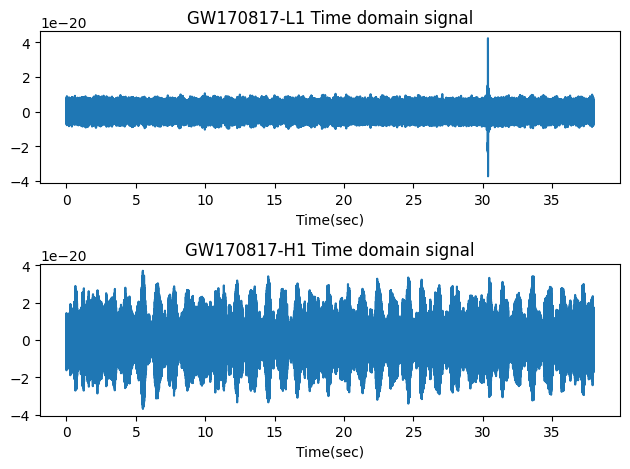

In [ ]:
GW170817L1_data=np.loadtxt('GW170817-L1-NS.txt')
GW170817L1_data1=pd.DataFrame(GW170817L1_data)
GW170817L1_data1
N=len(GW170817L1_data1)
GW170817L1_data1_fs=4096 # Hz frequency

# creating the time array:
GW170817L1_time=(np.arange(len(GW170817L1_data1)))/(GW170817L1_data1_fs)

# for convenience we will be converting the data into a time series one:
GW170817L1_timeseries = TimeSeries(GW170817L1_data1, delta_t=1/GW170817L1_data1_fs)
pylab.subplot(2,1,1)
plt.plot(GW170817L1_time,GW170817L1_data1)
plt.title('GW170817-L1 Time domain signal')
plt.xlabel('Time(sec)')


GW170817H1_data=np.loadtxt('GW170817-H1-NS.txt')
GW170817H1_data1=pd.DataFrame(GW170817H1_data)
GW170817H1_data1
N=len(GW170817H1_data1)
GW170817H1_data1_fs=4096 # Hz frequency

# creating the time array:
GW170817H1_time=(np.arange(len(GW170817H1_data1)))/(GW170817H1_data1_fs)

# for convenience we will be converting the data into a time series one:
GW170817H1_timeseries = TimeSeries(GW170817H1_data1, delta_t=1/GW170817H1_data1_fs)
pylab.subplot(2,1,2)
plt.plot(GW170817H1_time,GW170817H1_data1)
plt.title('GW170817-H1 Time domain signal')
plt.xlabel('Time(sec)')
plt.tight_layout()


##### Zoom into 1 second nearby to GW150914

When you just zoom in to one second around GW150914, all you can see is the low frequency behavior of the noise, since it is much louder than the higher frequency noise (and signal).

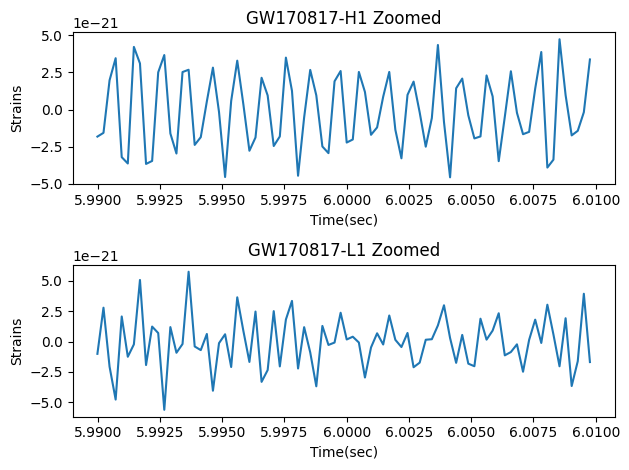

In [ ]:
GW170817L1_zoom = GW170817L1_timeseries.time_slice( 6- .01, 6  + 0.01)

pylab.subplot(2,1,2)
pylab.plot(GW170817L1_zoom.sample_times, GW170817L1_zoom, label='GW170817-L1')
plt.title('GW170817-L1 Zoomed')
plt.xlabel('Time(sec)')
pylab.ylabel('Strains')
plt.tight_layout()


GW170817H1_zoom = GW170817H1_timeseries.time_slice( 6- .01, 6  + 0.01)

pylab.subplot(2,1,1)
pylab.plot(GW170817H1_zoom.sample_times, GW170817H1_zoom, label='GW170817-H1')
plt.title('GW170817-H1 Zoomed')
pylab.ylabel('Strains')
plt.xlabel('Time(sec)')
plt.tight_layout()

# **Fourier Transform:**

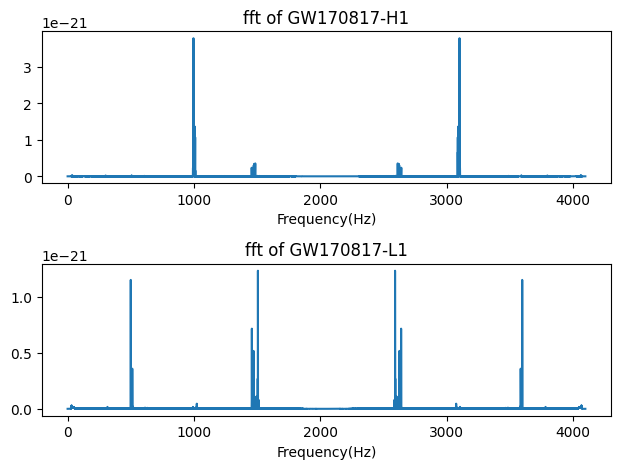

In [ ]:
# appy fourier transform
fft_GW170817H1_data= np.fft.ifft2(GW170817H1_data1)
fft_GW170817L1_data= np.fft.ifft2(GW170817L1_data1)
# creating the frequency domain:
GW170817L1_freq=np.arange(len(fft_GW170817L1_data))*(GW170817L1_data1_fs/len(fft_GW170817L1_data))
GW170817H1_freq=np.arange(len(fft_GW170817H1_data))*(GW170817H1_data1_fs/len(fft_GW170817H1_data))

pylab.subplot(2,1,1)
plt.plot(GW170817H1_freq,abs(fft_GW170817H1_data))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW170817-H1')

pylab.subplot(2,1,2)
plt.plot(GW170817L1_freq,abs(fft_GW170817L1_data))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW170817-L1')
plt.tight_layout()

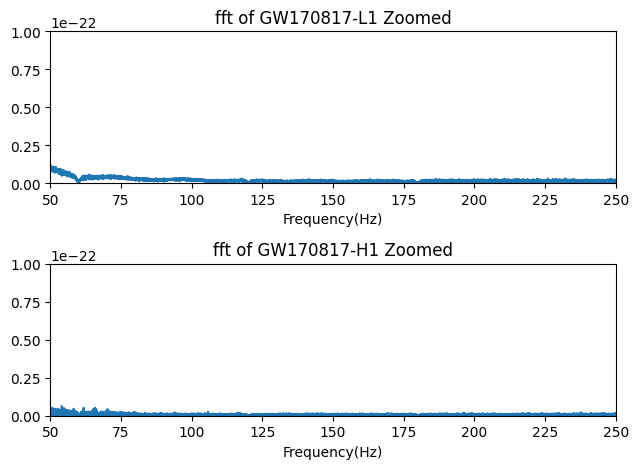

In [ ]:
pylab.subplot(2,1,1)
plt.plot(GW170817L1_freq,abs(fft_GW170817L1_data))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW170817-L1 Zoomed')
plt.ylim([0,0.1e-21])
plt.xlim([50,250])
#nyquist frequecy is at 2000Hz

pylab.subplot(2,1,2)
plt.plot(GW170817H1_freq,abs(fft_GW170817H1_data))
plt.xlabel('Frequency(Hz)')
plt.title('fft of GW170817-H1 Zoomed')
plt.ylim([0,0.1e-21])
plt.xlim([50,250])
pylab.tight_layout()

#Observation:

Most of the data contribution happens betwen the range of 50-250 Hz in both data L1 and H1, However the signal in both is burried under noise. the peaks observed in the fourier transforms also a result of noise.

In [ ]:
#t_human=1/10
N_win_GW170817H1=2**11 #N_w
2**math.ceil(np.log2(N_win_GW170817H1)) # get the power of 2
window=np.hanning(N_win_GW170817H1)
#window=np.ones(N_win_GW170817H1)
#window=np.hanning(N_win_GW170817H1)
# we need now to slide the window over all the signal and each time we do the fourier in the windiow interval
s=16 #slide
Ns_GW170817H1=int(math.floor(len(GW170817H1_data1)-N_win_GW170817H1)/(N_win_GW170817H1/s))

GW170817H1_Matrix=np.zeros((N_win_GW170817H1,Ns_GW170817H1),complex)

for i in range(Ns_GW170817H1):
  GW170817H1_Matrix[:,i]=np.fft.fft(GW170817H1_data[int((N_win_GW170817H1/s)*i):int((N_win_GW170817H1/s)*i+N_win_GW170817H1)]*window)



#FOR L1:

#t_human=1/10
N_win_GW170817L1=2**11 #N_w
2**math.ceil(np.log2(N_win_GW170817L1)) # get the power of 2
window=np.hanning(N_win_GW170817L1)
#window=np.ones(N_win_GW170817L1)
#window=np.hanning(N_win_GW170817L1)
# we need now to slide the window over all the signal and each time we do the fourier in the windiow interval
s=16 #slide
Ns_GW170817L1=int(math.floor(len(GW170817L1_data1)-N_win_GW170817L1)/(N_win_GW170817L1/s))

GW170817L1_Matrix=np.zeros((N_win_GW170817L1,Ns_GW170817L1),complex)

for i in range(Ns_GW170817L1):
  GW170817L1_Matrix[:,i]=np.fft.fft(GW170817L1_data[int((N_win_GW170817L1/s)*i):int((N_win_GW170817L1/s)*i+N_win_GW170817L1)]*window)

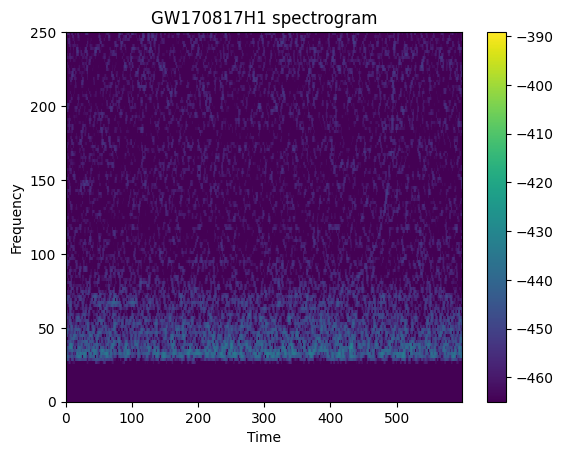

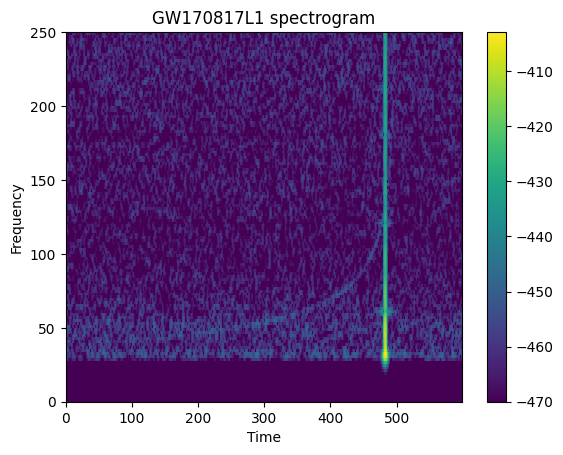

In [ ]:
freqsp = np.arange(N_win_GW170817H1) * GW170817H1_data1_fs / N_win_GW170817H1
timesp = np.arange(Ns_GW170817H1) * N_win_GW170817H1 / (GW170817H1_data1_fs)

# Create the pseudocolor plot
fig, ax = plt.subplots()
pc = ax.pcolorfast(timesp, freqsp, 10 * np.log(abs(GW170817H1_Matrix)),vmin=-465)

# Set the limit magnitude
limit_magnitude = 4e-20

# Set the edge color based on the limit magnitude
#for spine in ax.spines.values():
 #   if spine.spine_type == "bottom" or spine.spine_type == "top":
  #      spine.set_edgecolor('red' if limit_magnitude >= 0 else 'blue')
   # elif spine.spine_type == "left" or spine.spine_type == "right":
    #    spine.set_edgecolor('red' if limit_magnitude <= 0 else 'blue')

ax.set_title('GW170817H1 spectrogram')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_ylim([0, 250])

# Show the colorbar
plt.colorbar(pc)

# Show the plot
plt.show()


#FOR L1:
freqsp = np.arange(N_win_GW170817L1) * GW170817L1_data1_fs / N_win_GW170817L1
timesp = np.arange(Ns_GW170817L1) * N_win_GW170817L1 / (GW170817L1_data1_fs)

# Create the pseudocolor plot
fig, ax = plt.subplots()
pc = ax.pcolorfast(timesp, freqsp, 10 * np.log(abs(GW170817L1_Matrix)),vmin=-470)

# Set the limit magnitude
limit_magnitude = 4e-20

# Set the edge color based on the limit magnitude
#for spine in ax.spines.values():
 #   if spine.spine_type == "bottom" or spine.spine_type == "top":
  #      spine.set_edgecolor('red' if limit_magnitude >= 0 else 'blue')
   # elif spine.spine_type == "left" or spine.spine_type == "right":
    #    spine.set_edgecolor('red' if limit_magnitude <= 0 else 'blue')

ax.set_title('GW170817L1 spectrogram')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_ylim([0, 250])

# Show the colorbar
plt.colorbar(pc)

# Show the plot
plt.show()

Apply filtering:

From this point onwards we will be applying filters to clean the data and try to extract the signal from the noise.

#### **Highpass Filtering:**

We choose here a finite-impulse-response(FIR).Options:

 1) highpass frequency

 2) half sample length of highpass filter: higher value will give less ripple in passband

we will choose to highpass the data at a threshold of **15 Hz** as there is no contribution below that frequency.

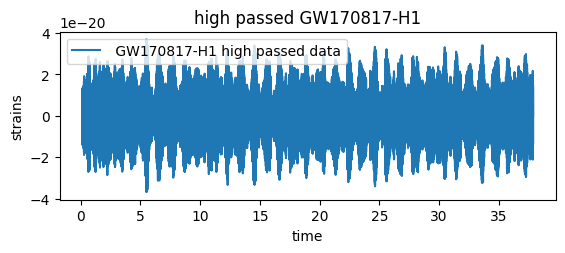

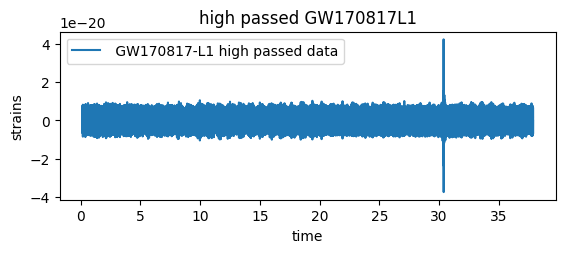

In [ ]:
high_GW170817L1 = GW170817L1_timeseries.highpass_fir(15, 512) # Highpass point is 15 Hz
high_GW170817H1 = GW170817H1_timeseries.highpass_fir(15, 512)

plt.subplot(2,1,2)
pylab.plot(high_GW170817H1.sample_times, high_GW170817H1, label=' GW170817-H1 high passed data')
pylab.legend()
plt.ylabel('strains')
plt.xlabel('time')
plt.title('high passed GW170817-H1')
pylab.show()

plt.subplot(2,1,1)
pylab.plot(high_GW170817L1.sample_times, high_GW170817L1, label=' GW170817-L1 high passed data')
pylab.legend()
plt.ylabel('strains')
plt.xlabel('time')
plt.title('high passed GW170817L1')
pylab.show()

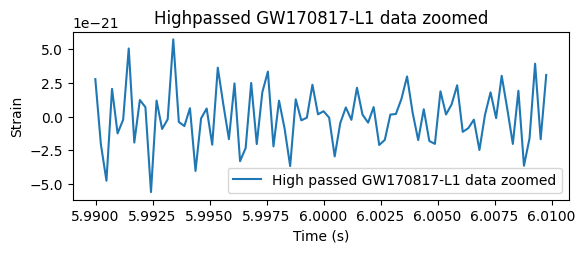

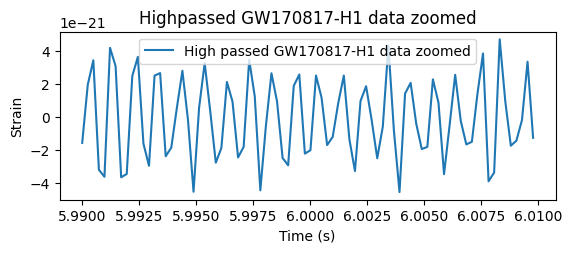

In [ ]:
# zoomed look on the data before cleaning it:

zoomL1 = high_GW170817L1.time_slice( 6- .01, 6  + 0.01)
plt.subplot(2,1,1)
pylab.plot(zoomL1.sample_times, zoomL1, label='High passed GW170817-L1 data zoomed')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Highpassed GW170817-L1 data zoomed')
pylab.legend()
pylab.show()

# zoomed look on the data before cleaning it:

zoomH1 = high_GW170817H1.time_slice( 6- .01, 6  + 0.01)
plt.subplot(2,1,2)
pylab.plot(zoomH1.sample_times, zoomH1, label='High passed GW170817-H1 data zoomed')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.title('Highpassed GW170817-H1 data zoomed')
pylab.legend()
pylab.show()


# **Whitening**

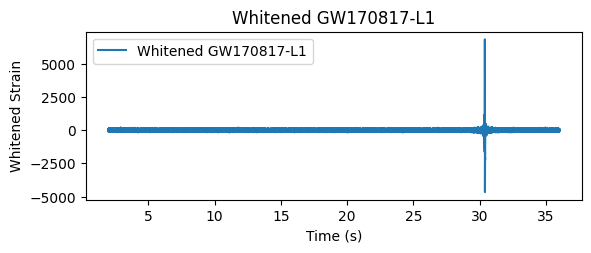

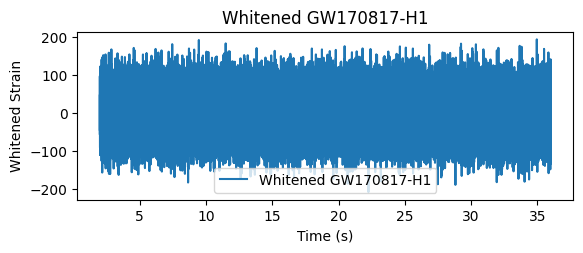

In [ ]:

# fix the dimensions to fit in the whiten function:
squeezed_GW170817L1_timeseries=np.squeeze(GW170817L1_timeseries)
squeezed_GW170817H1_timeseries=np.squeeze(GW170817H1_timeseries)
# rechange to a time series again
squeezed_GW170817L1_timeseries=TimeSeries(squeezed_GW170817L1_timeseries, delta_t=1/GW170817L1_data1_fs)
squeezed_GW170817H1_timeseries=TimeSeries(squeezed_GW170817H1_timeseries, delta_t=1/GW170817H1_data1_fs)
# end

# now Whiten the data
whitened = {}

    # This produces a whitened set.
    # This works by estimating the power spectral density from the
    # data and then flattening the frequency response.
    # (1) The first option sets the duration in seconds of each
    #     sample of the data used as part of the PSD estimate.
    # (2) The second option sets the duration of the filter to apply
whitened_GW170817L1 = squeezed_GW170817L1_timeseries.whiten(4, 4)

whitened = {}

    # This produces a whitened set.
    # This works by estimating the power spectral density from the
    # data and then flattening the frequency response.
    # (1) The first option sets the duration in seconds of each
    #     sample of the data used as part of the PSD estimate.
    # (2) The second option sets the duration of the filter to apply
whitened_GW170817H1 = squeezed_GW170817H1_timeseries.whiten(4, 4)


pylab.subplot(2,1,1)
pylab.plot(whitened_GW170817L1.sample_times, whitened_GW170817L1, label='Whitened GW170817-L1')
pylab.title('Whitened GW170817-L1')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

pylab.subplot(2,1,2)
pylab.plot(whitened_GW170817H1.sample_times, whitened_GW170817H1, label='Whitened GW170817-H1')
pylab.title('Whitened GW170817-H1')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()


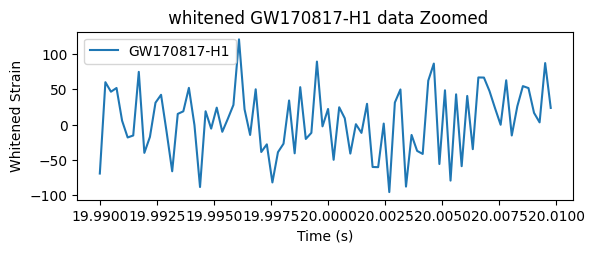

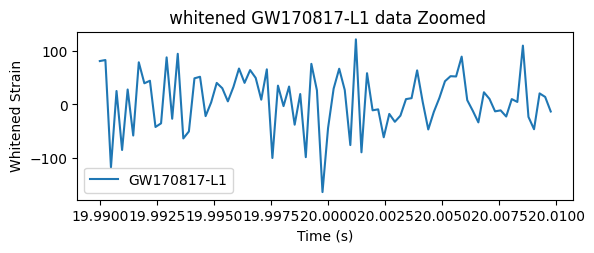

In [ ]:
# let's have a closer look on the data and zoom:
zoomH1 = whitened_GW170817H1.time_slice( 20- .01, 20  + 0.01)
pylab.subplot(2,1,2)
pylab.plot(zoomH1.sample_times, zoomH1, label='GW170817-H1')
pylab.title(' whitened GW170817-H1 data Zoomed')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

zoomL1 = whitened_GW170817L1.time_slice( 20- .01, 20  + 0.01)
pylab.subplot(2,1,1)
pylab.plot(zoomL1.sample_times, zoomL1, label='GW170817-L1')
pylab.title(' whitened GW170817-L1 data Zoomed')
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()



# **step 7:**  **Applying Bandpass Filter**

Similar to GW190814, We will now bandpass the data around GW150914 between 50 - 250 Hz.

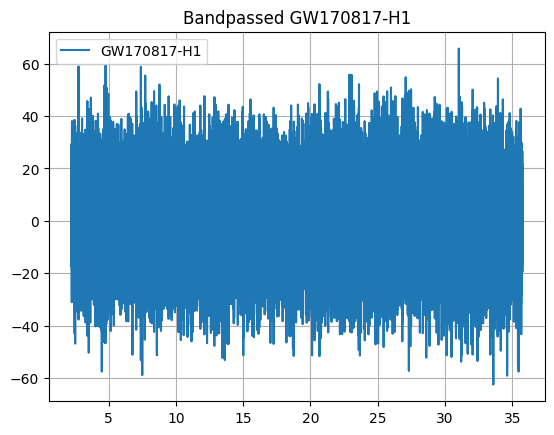

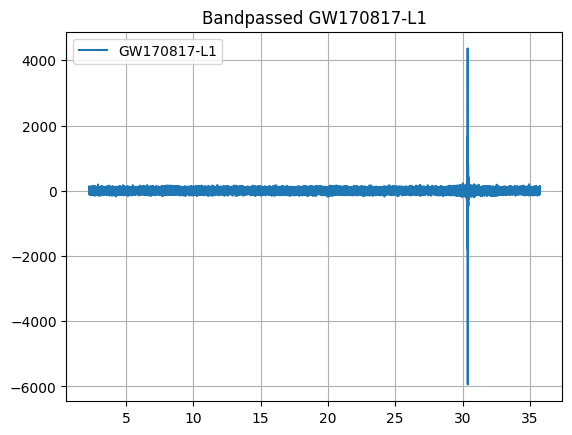

In [ ]:
# Apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz)
bpsd_GW170817H1 = whitened_GW170817H1.highpass_fir(30, 512).lowpass_fir(250, 512)
pylab.plot(bpsd_GW170817H1.sample_times, bpsd_GW170817H1, label='GW170817-H1')
pylab.title('Bandpassed GW170817-H1')
pylab.grid()
pylab.legend()
pylab.show()

# Apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz)
bpsd_GW170817L1 = whitened_GW170817L1.highpass_fir(30, 512).lowpass_fir(2000, 512)
pylab.plot(bpsd_GW170817L1.sample_times, bpsd_GW170817L1, label='GW170817-L1')
pylab.title('Bandpassed GW170817-L1')
pylab.grid()
pylab.legend()
pylab.show()

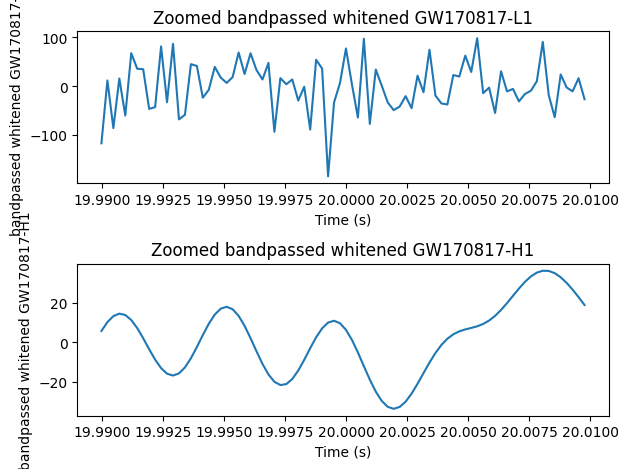

In [ ]:
zoomH1 = bpsd_GW170817H1.time_slice( 20- .01, 20  + 0.01)
plt.subplot(2,1,2)
pylab.plot(zoomH1.sample_times, zoomH1, label='GW170817-H1')
pylab.ylabel('bandpassed whitened GW170817-H1')
pylab.xlabel('Time (s)')
pylab.title('Zoomed bandpassed whitened GW170817-H1')

zoomL1 = bpsd_GW170817L1.time_slice( 20- .01, 20  + 0.01)
plt.subplot(2,1,1)
pylab.plot(zoomL1.sample_times, zoomL1, label='GW170817-L1')
pylab.ylabel('bandpassed whitened GW170817-L1')
pylab.xlabel('Time (s)')
pylab.title('Zoomed bandpassed whitened GW170817-L1')
plt.tight_layout()


#Observations:

we can see now that in  GW170817-H1 data,  there is a coherent signal that matches in phase for a few cycles, while in  GW170817-L1, there is still significant noise that haven't been filtered along the process.


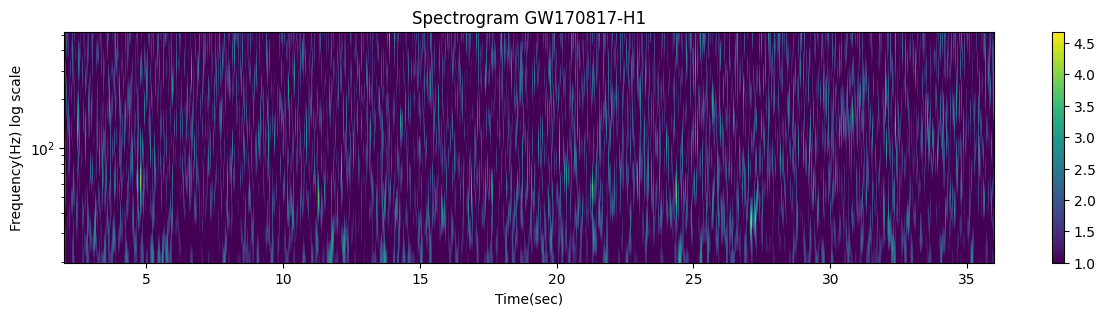

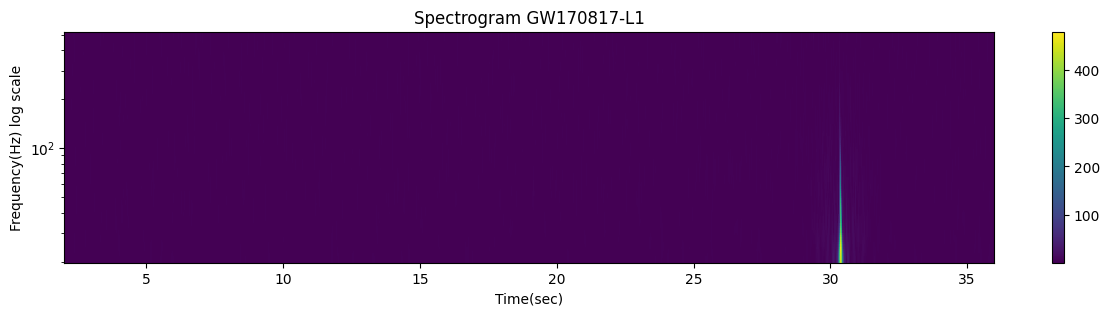

In [ ]:
GW170817H1_times, GW170817H1_freqs, GW170817H1_power = whitened_GW170817H1.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(20, 512),
                                         )
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(GW170817H1_times, GW170817H1_freqs, GW170817H1_power**0.5,vmin=1)
pylab.title('Spectrogram GW170817-H1')
pylab.colorbar()

pylab.yscale('log')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz) log scale')
pylab.show()


GW170817L1_times, GW170817L1_freqs, GW170817L1_power = whitened_GW170817L1.qtransform(.01, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(20, 512),
                                         )
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(GW170817L1_times, GW170817L1_freqs, GW170817L1_power**0.5)
pylab.title('Spectrogram GW170817-L1')
pylab.colorbar()

pylab.yscale('log')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz) log scale')
pylab.show()